---
# <div> COSC 2673/2793 | Machine Learning </div>
# <div> Assignment 2 (Part 2) Cell Type Classification Model </div>
    
---

Group 25:
* Sarang Kuniyil: s3914175
* Aayushi Khatri: s3948240    
---

## Table of Contents

* [Introduction](#introduction)
* [Loading in images](#Loading)
* [Table Modification](#imgpath)
* [Creating data genarator](#data_gen)
* [Model 1](#model1)
* [Model 2](#model2)
* [Model 3](#model3)
* [Model 4](#model4)
* [Testing the Model](#testing)
* [Ultimate Judgement & Conclusions](#conclusion)
* [References](#references)

# Introduction

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import imghdr

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data_cell')

Found 9896 files belonging to 4 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
#allowing us to loop through the data and returns a batch
batch = data_iterator.next()

2023-05-15 21:58:29.586339: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
batch[0].shape

(32, 256, 256, 3)

In [6]:
batch[1]

array([1, 1, 0, 2, 1, 2, 0, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 3, 0, 2,
       0, 2, 3, 0, 2, 3, 3, 2, 3, 0], dtype=int32)

## Loading the images  <a class="anchor" id="Loading"></a>

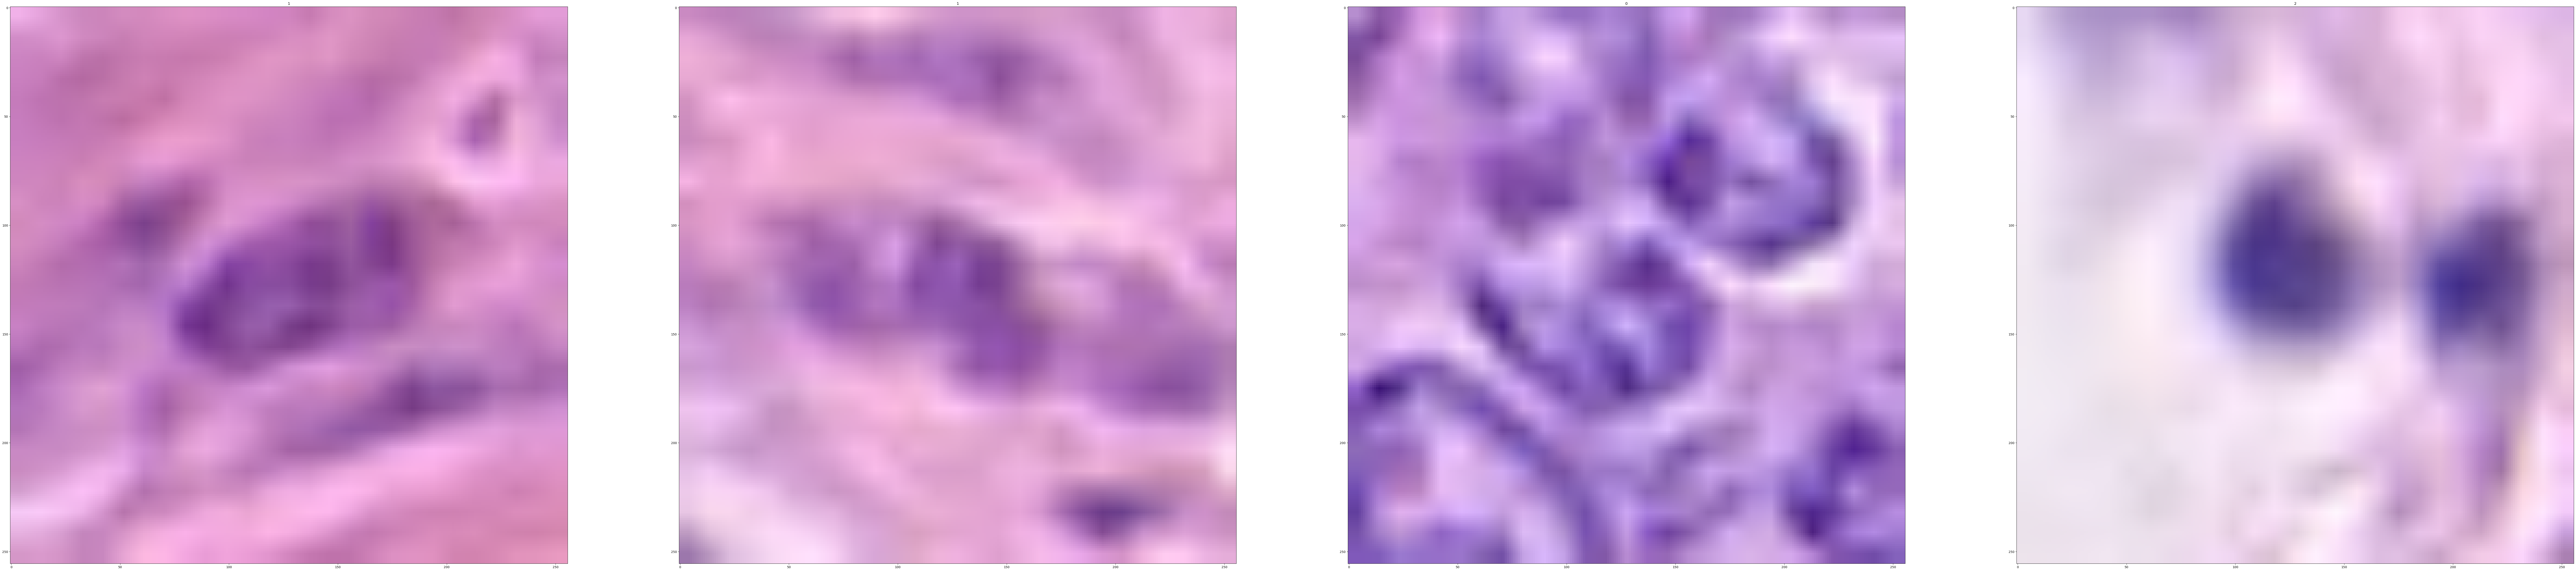

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(150,150))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
class_names = data.class_names
print(class_names)

['epithelial_type_2', 'fibroblast_type_0', 'inflammatory_type_1', 'others_type_3']


In [9]:
#transform the data in the pipeline
#x is the image
#y is the target variable, the label
#we are dividing by 255 so the values are between 0 and 1
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          ...,
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903]],
 
         [[0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          ...,
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903]],
 
         [[0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          [0.8666667 , 0.65882355, 0.8156863 ],
          ...,
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903],
          [0.7921569 , 0.5882353 , 0.77254903]],
 
         ...,
 
         [[0.9529412 , 0.7490196 , 0.92156863],
          [0.95294

In [11]:
len(data)

310

## Adding image path to the the table <a class="anchor" id="imgpath"></a>

In [12]:
data = pd.read_csv("data_labels_mainData.csv",delimiter=',')
data['ImgPath'] = '../Image_classification_data/patch_images/' + data['ImageName']
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,ImgPath
0,22405,1,22405.png,fibroblast,0,0,../Image_classification_data/patch_images/2240...
1,22406,1,22406.png,fibroblast,0,0,../Image_classification_data/patch_images/2240...
2,22407,1,22407.png,fibroblast,0,0,../Image_classification_data/patch_images/2240...
3,22408,1,22408.png,fibroblast,0,0,../Image_classification_data/patch_images/2240...
4,22409,1,22409.png,fibroblast,0,0,../Image_classification_data/patch_images/2240...


In [13]:
    
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd



OUTPUT_CLASSES = 4


# Uncomment the following line to do two class classification with

# data = data[(data['cellType'] == 3) | (data['cellType'] == 5)]
# OUTPUT_CLASSES = 4

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow_addons.metrics import F1Score

/Users/sarangkuniyil/anaconda3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Creating the data generator for each split <a class="anchor" id="data_gen"></a>

In [19]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')



train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="ImgPath",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="ImgPath",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')


Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


## Evaluation Framework 

The three evaluation metrics we will use to assess the success of the model are:
* `Loss`
* `Precision`
* `Recall`
* `F1 Score`

## building models using VGG blocks

We are using VGG block because its effective for image classification due to its deep architecture and the use of small 3x3 filters. This combination allows it to capture complex and abstract features from images, leading to improved representation learning. The stacked convolutional layers within the VGG block enable the network to learn hierarchical representations of increasing complexity, which aids in distinguishing between different classes of images. Additionally, the small filter sizes enable the network to capture fine-grained details and local patterns, improving its ability to recognize objects and discriminate between different visual features. Overall, the VGG block's depth and small filters contribute to its strong performance in image classification tasks.                                                 

## Model 1 / Baseline Model <a class="anchor" id="model1"></a>

We are using relu activation for all the layers

In [52]:
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [53]:

# Train the model
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score(num_classes=4, average='macro')])
from keras.callbacks import TensorBoard
logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)
history1 = model_VGG_1.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks=[tensorboard_callback])

Epoch 1/25
186/186 [==============================] - 6s 29ms/step - loss: 1.1057 - precision_7: 0.5619 - recall_7: 0.4758 - f1_score: 0.3934 - val_loss: 0.8932 - val_precision_7: 0.6691 - val_recall_7: 0.6129 - val_f1_score: 0.4734
Epoch 2/25
186/186 [==============================] - 5s 28ms/step - loss: 0.7943 - precision_7: 0.5973 - recall_7: 0.7640 - f1_score: 0.5830 - val_loss: 0.7071 - val_precision_7: 0.5870 - val_recall_7: 0.8231 - val_f1_score: 0.6390
Epoch 3/25
186/186 [==============================] - 5s 28ms/step - loss: 0.7668 - precision_7: 0.5813 - recall_7: 0.7844 - f1_score: 0.6088 - val_loss: 0.7747 - val_precision_7: 0.6733 - val_recall_7: 0.7322 - val_f1_score: 0.5453
Epoch 4/25
186/186 [==============================] - 5s 29ms/step - loss: 0.6940 - precision_7: 0.5871 - recall_7: 0.8210 - f1_score: 0.6484 - val_loss: 0.7812 - val_precision_7: 0.5866 - val_recall_7: 0.7671 - val_f1_score: 0.5294
Epoch 5/25
186/186 [==============================] - 5s 29ms/step -

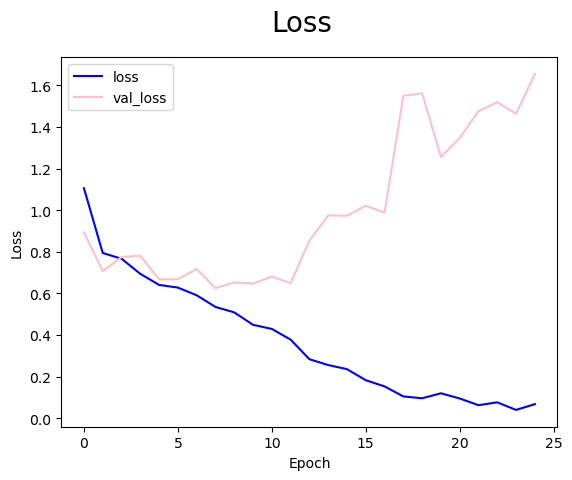

In [54]:
fig = plt.figure()
plt.plot(history1.history['loss'], color='blue', label='loss')
plt.plot(history1.history['val_loss'], color='pink', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

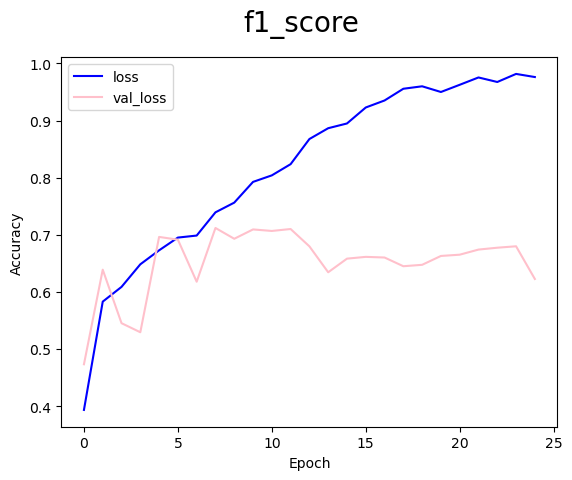

In [55]:
fig = plt.figure()
plt.plot(history1.history['f1_score'], color='blue', label='loss')
plt.plot(history1.history['val_f1_score'], color='pink', label='val_loss')
fig.suptitle('f1_score', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

The model we have created is overfitting. We will try to resolve this in our next model

## Model 2 <a class="anchor" id="model2"></a>


Model 2 is the same as our model 1 but we have tuned the number of epochs by adding earlystopping method

In [85]:
import tensorflow as tf


model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [28]:
from sklearn.metrics import f1_score
from tensorflow_addons.metrics import F1Score


# Train the model
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score(num_classes=4, average='macro')])
from keras.callbacks import TensorBoard, EarlyStopping
logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)
earlystop_callback = EarlyStopping(patience=3, monitor='val_loss')
history2 = model_VGG_2.fit(train_generator, epochs=125, validation_data=validation_generator, callbacks=[tensorboard_callback, earlystop_callback])

Epoch 1/125
186/186 [==============================] - 7s 34ms/step - loss: 1.2915 - precision_1: 0.4474 - recall_1: 0.1935 - f1_score: 0.1989 - val_loss: 1.1874 - val_precision_1: 0.7616 - val_recall_1: 0.2244 - val_f1_score: 0.3150
Epoch 2/125
186/186 [==============================] - 6s 31ms/step - loss: 1.0234 - precision_1: 0.5405 - recall_1: 0.5538 - f1_score: 0.3893 - val_loss: 0.9539 - val_precision_1: 0.6139 - val_recall_1: 0.6059 - val_f1_score: 0.4367
Epoch 3/125
186/186 [==============================] - 6s 30ms/step - loss: 0.8316 - precision_1: 0.5620 - recall_1: 0.7746 - f1_score: 0.5512 - val_loss: 0.7474 - val_precision_1: 0.6085 - val_recall_1: 0.8034 - val_f1_score: 0.5736
Epoch 4/125
186/186 [==============================] - 5s 29ms/step - loss: 0.7463 - precision_1: 0.5362 - recall_1: 0.8341 - f1_score: 0.6024 - val_loss: 0.6624 - val_precision_1: 0.5832 - val_recall_1: 0.8555 - val_f1_score: 0.6711
Epoch 5/125
186/186 [==============================] - 6s 30ms/s

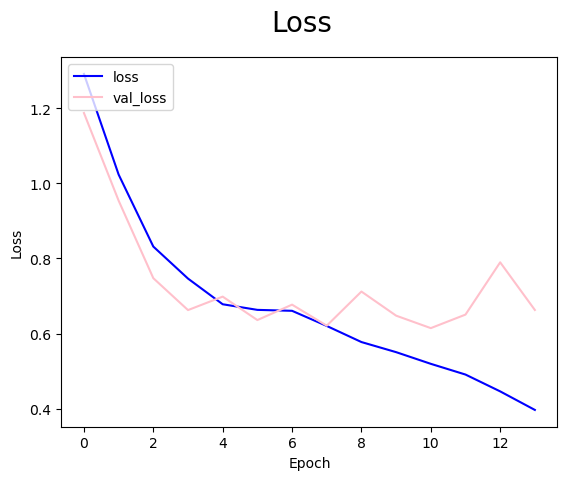

In [29]:
fig = plt.figure()
plt.plot(history2.history['loss'], color='blue', label='loss')
plt.plot(history2.history['val_loss'], color='pink', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

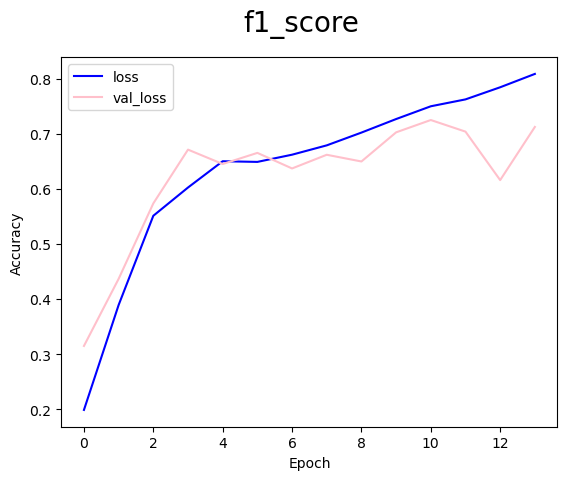

In [30]:
fig = plt.figure()
plt.plot(history2.history['f1_score'], color='blue', label='loss')
plt.plot(history2.history['val_f1_score'], color='pink', label='val_loss')
fig.suptitle('f1_score', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

## Model 3 <a class="anchor" id="model3"></a>

Adding regularization

In [99]:
import tensorflow as tf

reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [100]:
from sklearn.metrics import f1_score

# Train the model
model_VGG_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score(num_classes=4, average='macro')])
from keras.callbacks import TensorBoard, EarlyStopping
logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)
earlystop_callback = EarlyStopping(patience=3, monitor='val_loss')
history3 = model_VGG_3.fit(train_generator, epochs=125, validation_data=validation_generator, callbacks=[tensorboard_callback, earlystop_callback])


Epoch 1/125
186/186 [==============================] - 6s 29ms/step - loss: 1.4579 - precision_17: 0.4289 - recall_17: 0.2387 - f1_score: 0.1822 - val_loss: 1.3535 - val_precision_17: 0.4093 - val_recall_17: 0.4093 - val_f1_score: 0.1452
Epoch 2/125
186/186 [==============================] - 5s 29ms/step - loss: 1.1906 - precision_17: 0.5055 - recall_17: 0.3551 - f1_score: 0.2773 - val_loss: 1.2525 - val_precision_17: 0.5041 - val_recall_17: 0.4654 - val_f1_score: 0.2572
Epoch 3/125
186/186 [==============================] - 5s 29ms/step - loss: 1.0220 - precision_17: 0.5078 - recall_17: 0.6397 - f1_score: 0.3781 - val_loss: 0.9436 - val_precision_17: 0.5290 - val_recall_17: 0.7145 - val_f1_score: 0.3495
Epoch 4/125
186/186 [==============================] - 5s 29ms/step - loss: 0.9803 - precision_17: 0.4876 - recall_17: 0.7339 - f1_score: 0.4277 - val_loss: 0.9219 - val_precision_17: 0.5249 - val_recall_17: 0.7716 - val_f1_score: 0.4067
Epoch 5/125
186/186 [===========================

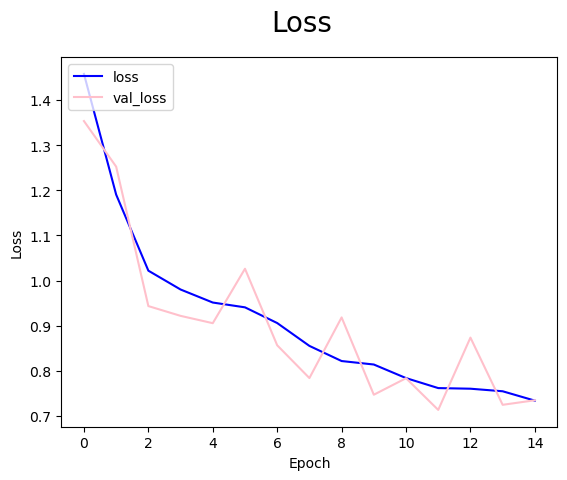

In [102]:
fig = plt.figure()
plt.plot(history3.history['loss'], color='blue', label='loss')
plt.plot(history3.history['val_loss'], color='pink', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

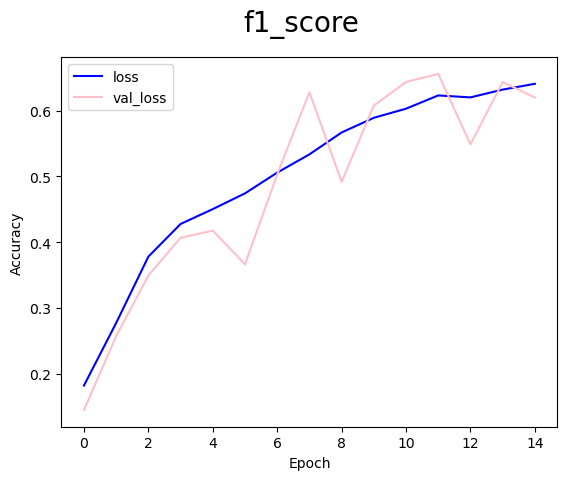

In [103]:
fig = plt.figure()
plt.plot(history3.history['f1_score'], color='blue', label='loss')
plt.plot(history3.history['val_f1_score'], color='pink', label='val_loss')
fig.suptitle('f1_score', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

## Model 4  <a class="anchor" id="model4"></a>


In this model we try to further reduce our overfitting by adding L2 regularization and dropout layer

In [104]:
reg_lambda = 0.001

model_VGG_4 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [105]:
from sklearn.metrics import f1_score

# Train the model
model_VGG_4.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score(num_classes=4, average='macro')])
from keras.callbacks import TensorBoard, EarlyStopping
logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)
earlystop_callback = EarlyStopping(patience=3, monitor='val_loss')
history4 = model_VGG_4.fit(train_generator, epochs=125, validation_data=validation_generator, callbacks=[tensorboard_callback, earlystop_callback])

Epoch 1/125
186/186 [==============================] - 6s 30ms/step - loss: 1.3278 - precision_18: 0.5360 - recall_18: 0.4339 - f1_score: 0.3399 - val_loss: 1.2128 - val_precision_18: 0.5666 - val_recall_18: 0.4704 - val_f1_score: 0.3327
Epoch 2/125
186/186 [==============================] - 5s 30ms/step - loss: 0.9958 - precision_18: 0.5746 - recall_18: 0.7068 - f1_score: 0.5131 - val_loss: 0.8716 - val_precision_18: 0.5812 - val_recall_18: 0.8196 - val_f1_score: 0.5741
Epoch 3/125
186/186 [==============================] - 5s 29ms/step - loss: 0.9288 - precision_18: 0.5810 - recall_18: 0.7529 - f1_score: 0.5312 - val_loss: 0.9178 - val_precision_18: 0.6323 - val_recall_18: 0.7620 - val_f1_score: 0.5187
Epoch 4/125
186/186 [==============================] - 5s 29ms/step - loss: 0.8495 - precision_18: 0.5808 - recall_18: 0.8036 - f1_score: 0.5837 - val_loss: 0.8318 - val_precision_18: 0.5742 - val_recall_18: 0.8267 - val_f1_score: 0.6010
Epoch 5/125
186/186 [===========================

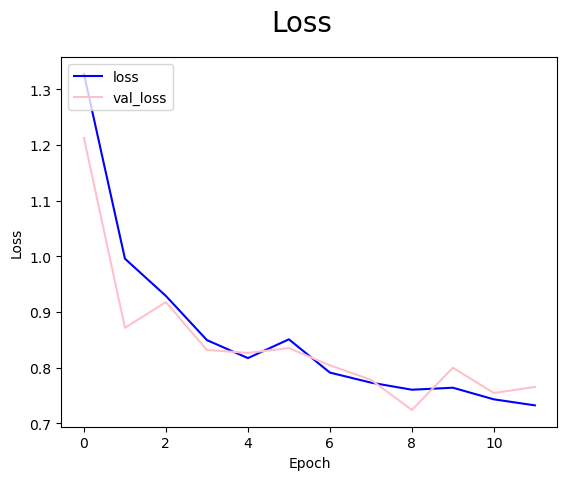

In [107]:
fig = plt.figure()
plt.plot(history4.history['loss'], color='blue', label='loss')
plt.plot(history4.history['val_loss'], color='pink', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

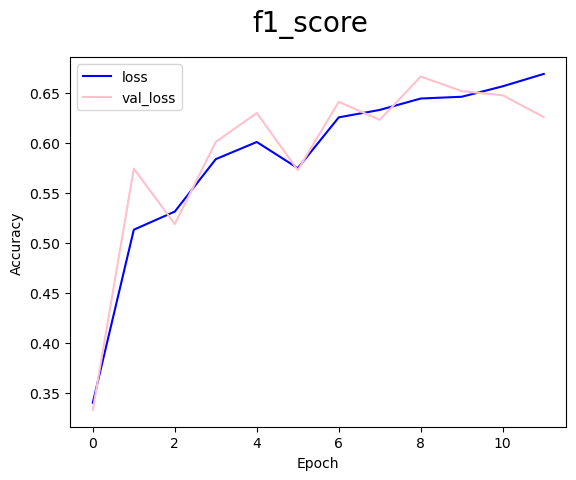

In [108]:
fig = plt.figure()
plt.plot(history4.history['f1_score'], color='blue', label='loss')
plt.plot(history4.history['val_f1_score'], color='pink', label='val_loss')
fig.suptitle('f1_score', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

### Testing <a class="anchor" id="testing"></a>

In [89]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="ImgPath",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 4 classes.


In [90]:

model_VGG_4.evaluate(test_generator)

62/62 [==============================] - 1s 9ms/step - loss: 0.7796 - precision_15: 0.6531 - recall_15: 0.8167 - f1_score: 0.6623


[0.7795881628990173, 0.6530694961547852, 0.8166666626930237, 0.662290096282959]

### References
* Alavi, A. (n.d.). Bitbucket. [online] bitbucket.org. Available at: https://bitbucket.org/alavi_a/rmit_aalavi-cosc2673_2793/src/main/labs/week09_DeepLearning/ [Accessed 8 May 2023].
* Alavi, A. (n.d.). Bitbucket. [online] bitbucket.org. Available at: https://bitbucket.org/alavi_a/rmit_aalavi-cosc2673_2793/src/main/labs/week10_RuleLearning/ [Accessed 8 May 2023].